In [6]:
#import the dependinces
import pandas as pd
import csv
import numpy as np
import gmaps
import datetime
import time
from scipy import stats
from matplotlib import pyplot as plt
import os
import warnings

from config import api_key

gmaps_configure(key=api_key)

# Ignore unnecessary gmaps warning
warnings.filterwarnings('ignore')

In [11]:
#Read the crime data
NYC = pd.read_csv("../crime_data/Cleaned_NYC_Arrests.csv")
lapd = pd.read_csv("../crime_data/Clean_La_Crime.csv")

NYC_october_2014 = pd.read_csv("../crime_data/october_2014.csv")

In [8]:
#New York City DataFrame
NYC

,Unnamed: 0,ARREST_DATE,PD_DESC,OFNS_DESC,AGE_GROUP,PERP_SEX,PERP_RACE,Latitude,Longitude
0,3,12/31/2017,ASSAULT 3,ASSAULT 3 & RELATED OFFENSES,25-44,M,WHITE,40.763523,-73.987074
1,4,12/31/2017,ASSAULT 3,ASSAULT 3 & RELATED OFFENSES,45-64,M,BLACK,40.759768,-73.989811
2,6,12/31/2017,ASSAULT 3,ASSAULT 3 & RELATED OFFENSES,18-24,F,WHITE HISPANIC,40.722199,-73.977122
3,8,12/31/2017,ASSAULT 3,ASSAULT 3 & RELATED OFFENSES,25-44,M,BLACK HISPANIC,40.787496,-73.949752
4,10,12/31/2017,ASSAULT 3,ASSAULT 3 & RELATED OFFENSES,25-44,M,WHITE HISPANIC,40.702840,-73.929467
...,...,...,...,...,...,...,...,...,...
158809,1048554,9/6/2014,ASSAULT 3,ASSAULT 3 & RELATED OFFENSES,25-44,M,WHITE HISPANIC,40.748101,-73.879560
158810,1048562,9/6/2014,ASSAULT 3,ASSAULT 3 & RELATED OFFENSES,45-64,M,BLACK,40.810877,-73.941064
158811,1048564,9/6/2014,ASSAULT 3,ASSAULT 3 & RELATED OFFENSES,18-24,M,WHITE HISPANIC,40.707936,-73.802907
158812,1048567,9/6/2014,"ASSAULT 2,1,UNCLASSIFIED",FELONY ASSAULT,65+,M,WHITE,40.740275,-73.848865


In [9]:
#LA DataFrame
lapd

,DATE OCC,TIME OCC,AREA,AREA NAME,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Premis Desc,Weapon Desc,Status Desc,LAT,LON
0,02/20/2010 12:00:00 AM,1350,13,Newton,VIOLATION OF COURT ORDER,48,M,H,SINGLE FAMILY DWELLING,NaN,Adult Arrest,33.9825,-118.2695
1,09/12/2010 12:00:00 AM,45,14,Pacific,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",0,M,W,STREET,NaN,Invest Cont,33.9599,-118.3962
2,08/09/2010 12:00:00 AM,1515,13,Newton,OTHER MISCELLANEOUS CRIME,0,M,H,ALLEY,NaN,Invest Cont,34.0224,-118.2524
3,01/05/2010 12:00:00 AM,150,6,Hollywood,VIOLATION OF COURT ORDER,47,F,W,STREET,HAND GUN,Invest Cont,34.1016,-118.3295
4,01/02/2010 12:00:00 AM,2100,1,Central,"RAPE, ATTEMPTED",47,F,H,ALLEY,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",Invest Cont,34.0387,-118.2488
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2111674,03/28/2019 12:00:00 AM,400,6,Hollywood,ARSON,0,X,X,SEX ORIENTED/BOOK STORE/STRIP CLUB/GENTLEMAN'S...,FIRE,Invest Cont,34.0962,-118.3490
2111675,08/14/2019 12:00:00 AM,1810,7,Wilshire,THEFT FROM MOTOR VEHICLE - GRAND ($400 AND OVER),40,M,W,STREET,NaN,Invest Cont,34.0871,-118.3732
2111676,01/06/2019 12:00:00 AM,2100,20,Olympic,CRIMINAL THREATS - NO WEAPON DISPLAYED,46,F,B,SIDEWALK,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",Invest Cont,34.0637,-118.2870
2111677,10/16/2019 12:00:00 AM,1800,17,Devonshire,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),0,NaN,NaN,STREET,NaN,Invest Cont,34.2266,-118.5085


In [12]:
#October 2014 New York City DataFrame
NYC_october_2014

,ARREST_DATE,PD_DESC,OFNS_DESC,AGE_GROUP,PERP_SEX,PERP_RACE,Latitude,Longitude
0,10/31/2014,ASSAULT 3,ASSAULT 3 & RELATED OFFENSES,25-44,M,WHITE HISPANIC,40.731668,-73.989415
1,10/31/2014,ASSAULT 3,ASSAULT 3 & RELATED OFFENSES,18-24,M,WHITE HISPANIC,40.864328,-73.868406
2,10/31/2014,"MURDER,UNCLASSIFIED",MURDER & NON-NEGL. MANSLAUGHTER,25-44,F,BLACK,40.671111,-73.913563
3,10/31/2014,"ASSAULT 2,1,UNCLASSIFIED",FELONY ASSAULT,18-24,F,BLACK,40.648867,-73.950822
4,10/31/2014,ASSAULT 3,ASSAULT 3 & RELATED OFFENSES,25-44,M,BLACK,40.717115,-73.920426
...,...,...,...,...,...,...,...,...
4491,10/1/2014,ASSAULT 3,ASSAULT 3 & RELATED OFFENSES,18-24,F,BLACK HISPANIC,40.816088,-73.895824
4492,10/1/2014,"ASSAULT 2,1,UNCLASSIFIED",FELONY ASSAULT,18-24,F,WHITE HISPANIC,40.691647,-73.865180
4493,10/1/2014,"ASSAULT 2,1,UNCLASSIFIED",FELONY ASSAULT,25-44,M,BLACK,40.836601,-73.889070
4494,10/1/2014,ASSAULT 3,ASSAULT 3 & RELATED OFFENSES,45-64,M,WHITE HISPANIC,40.626282,-73.962547


In [5]:
#get the latitudes and longitudes for each crime in both the cities
LA_lats = lapd["LAT"]
LA_lngs = lapd["LON"]

In [6]:
#Specific data for NYC most dangerous month
OCT_lats = october_2014["Latitude"]
OCT_lngs = october_2014["Longitude"]

In [13]:
#NYC arrest data heatmap of assaults overall 


In [ ]:
#Most Unsafe fast food restaurants in NYC heatmap


In [ ]:
#Most Unsafe fast food restaurants in LA heatmap


In [ ]:
#Comparing crime by seasons


In [ ]:
#Plot of crime based on time of year


In [ ]:
#Comparing NYC to LA 


Text(0.5, 1.0, "Who's Fault Is It?")

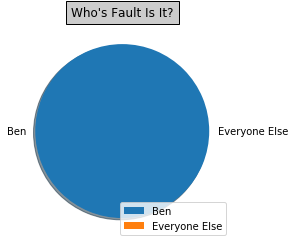

In [7]:
#Ben's Fault Chart
fault = {
    'Ben':[1],
    'Everyone_Else':[0]
}
fault = pd.DataFrame(data=fault)
labels = ["Ben","Everyone Else"]
#-------------------------------------------------------------------
plt.pie(fault, labels=labels, shadow=True)
plt.legend(loc="lower right")
plt.title("Who's Fault Is It?", bbox={'facecolor':'0.8', 'pad':5})